# **Description**

**Model Card: Predicting Olympic Medal Counts**

**Motivation behind this model:**
The motivation behind this model is its simplicity. While it is not be directly relevant to the software industry I work in, my specific role is in Sales, and my primary objective for this course is to effectively communicate Machine Learning (ML) and Artificial Intelligence (AI) concepts to clients in simple terms. As a consequence, I want to work through an extremely simple and understandable model that can be easily translated to those from a non-technical background. Additionally, I recognise the importance of client engagement in sales and the value of fostering long-term relationships. By demystifying complex ML and AI concepts and providing clear explanations, I aim to engage clients more effectively and build trust over time, hence I have chosen this simple model which aims to predict the number of medals a country will win in the olympics.

**Hypothesis:**
I hypothesise that we can predict the number of medals won by each country in the Olympics using a machine learning model trained on historical data. By incorporating features such as the number of athletes, country demographics, and past performance, we aim to capture the underlying patterns and trends driving Olympic success.

**Training Data:**
I will use a dataset containing information on the number of medals each country won at each Olympics, along with additional data such as the number of athletes, country demographics, and historical performance. The dataset will be split into training and testing sets to train and evaluate the model's performance.

**Datasheet**  
Context: This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016.   
Motivation: The dataset was created to allow kagglers to participate in a entry level ML competition.  
Composition:It is made up of instances of each country's entry into the winter and summer olympics, with a number of attributes attached.  
Collection Processing: The data was colected through R code that scraped data from the website www.sports-reference.com  
Preprocssing: I will clean the data within the notebook, primarily removing missing values.  
Maintenance: Unmaintained.

**Disclaimer: The dataset has been sourced from this orignal kaggle project: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results/data**

**Model Details / Model Architecture:**
I will experiment with various machine learning algorithms, including linear regression, decision trees, and random forests, to predict Olympic medal counts.

**Performance Metrics:**
Performance will be evaluated using metrics such as mean absolute error (MAE), root mean squared error (RMSE), and coefficient of determination (R² score). These metrics will provide insights into the accuracy and reliability of the model's predictions.

**Potential Biases:**
Potential biases may arise from imbalances in the training data, such as overrepresentation of certain countries or Olympics. Additionally, biases may be introduced through the selection of predictors, leading to skewed predictions. Mitigation strategies will be implemented to address these biases, including careful feature selection and evaluation of model fairness.

**Responsible AI Considerations:**
I will ensure responsible AI practices throughout the model development process, including ethical data collection and usage, transparency in model design and decision-making, and accountability for potential biases. Model explanations and interpretability techniques will be employed to enhance transparency and facilitate understanding of model predictions.

# The Data



In [178]:
import pandas as pd

In [179]:
teams = pd.read_csv("teams.csv")

In [180]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [181]:
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]

In [182]:
# Compute the correlation coefficients between the "medals" column and all other columns in the "teams" DataFrame
teams.corr()["medals"]


year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

# **Visualisation**



In [183]:
import seaborn as sns

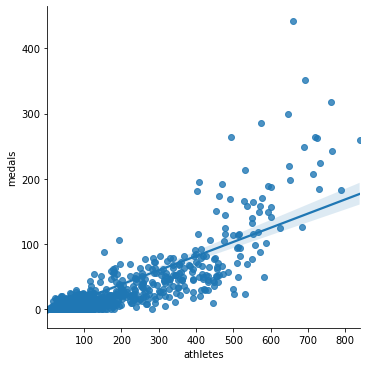

In [184]:
sns.lmplot(x='athletes',y='medals',data=teams,fit_reg=True) 

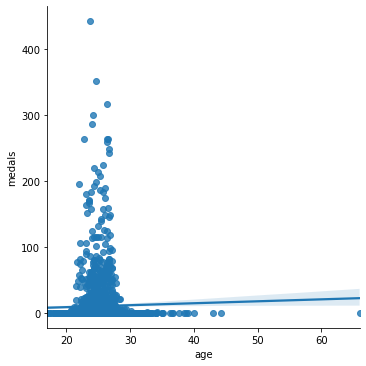

In [185]:
sns.lmplot(x='age', y='medals', data=teams, fit_reg=True) 

<AxesSubplot:ylabel='Frequency'>

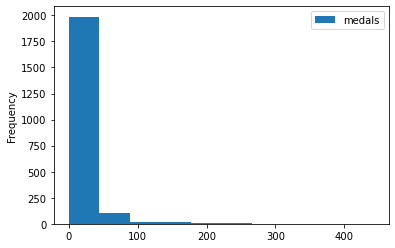

In [186]:
teams.plot.hist(y="medals")

In [187]:
# Identify rows in the 'teams' DataFrame where at least one value is missing (NaN)
# Print the first 20 rows where missing values are present

teams[teams.isnull().any(axis=1)].head(20)


,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
82,ARM,Armenia,1996,38,24.0,NaN,2
88,ARU,Aruba,1988,12,27.8,NaN,0
96,ASA,American Samoa,1988,6,27.0,NaN,0
131,AZE,Azerbaijan,1996,24,25.1,NaN,1
150,BAN,Bangladesh,1984,2,21.0,NaN,0


# **Data Cleaning**

In [188]:
teams = teams.dropna()

In [189]:
teams.shape

(2014, 7)

In [190]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [191]:
# About 80% of the data
train.shape

(1609, 7)

In [192]:
# About 20% of the data
test.shape

(405, 7)

# Model Selection

The model will be solving for a regression problem and I will chose the most suitable model based on the error results below,
I will chose from the following three types: Linear Regression, Decision Tree and Random Forest.

Here are some condsiderations of the models below:

Linear regression offers interpretability and simplicity but assumes linear relationships and can overfit without regularization. Decision trees provide intuitive interpretations but are prone to overfitting and lack robustness. Random Forest, an ensemble method, balances bias and variance, handles large datasets, and offers robust predictions by aggregating multiple decision trees. Ultimately, the choice will depends on the tradeoff between interpretability, robustness, and predictive performance, however in my instance for this use case primarily predictive performance.




**Linear Regression Model**

In [193]:
# Import the necessary library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
reg = LinearRegression()

# Define the predictors for the model
reg_predictors = ["athletes", "prev_medals"]

# Train the Linear Regression model using the training data
reg.fit(train[predictors], train["medals"])

# Make predictions on the test data using the trained model
reg_predictions = reg.predict(test[predictors])

 **Decision Tree Model**

In [194]:
# Import the necessary library for Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor object
dt_regressor = DecisionTreeRegressor()

# Train the Decision Tree Regressor model using the training data
dt_regressor.fit(train[predictors], train["medals"])

# Make predictions on the test data using the trained model
dt_predictions = dt_regressor.predict(test[predictors])

**Random forest Model**

In [195]:
# Import the necessary library for Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor object
rf_regressor = RandomForestRegressor()

# Train the Random Forest Regressor model using the training data
rf_regressor.fit(train[predictors], train["medals"])

# Make predictions on the test data using the trained model
rf_predictions = rf_regressor.predict(test[predictors])

# Measuring the Error

Mean Absolute Error

In [196]:
# Import the necessary library for calculating Mean Absolute Error
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE) for Linear Regression
error = mean_absolute_error(test["medals"], reg_predictions)
print("Mean Absolute Error for Linear Regression:", error)

# Calculate MAE for Decision Tree
dt_error = mean_absolute_error(test["medals"], dt_predictions)
print("Mean Absolute Error for Decision Tree:", dt_error)

# Calculate MAE for Random Forest
rf_error = mean_absolute_error(test["medals"], rf_predictions)
print("Mean Absolute Error for Random Forest:", rf_error)

Mean Absolute Error for Linear Regression: 4.195519784672641
Mean Absolute Error for Decision Tree: 5.426132622382874
Mean Absolute Error for Random Forest: 3.873427878486685


RMSE

In [197]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error
import numpy as np

# Compute Root Mean Squared Error (RMSE) for Linear Regression
reg_rmse = np.sqrt(mean_squared_error(test["medals"], reg_predictions))
print("Root Mean Squared Error for Linear Regression:", reg_rmse)

# Compute RMSE for Decision Tree
dt_rmse = np.sqrt(mean_squared_error(test["medals"], dt_predictions))
print("Root Mean Squared Error for Decision Tree:", dt_rmse)

# Compute RMSE for Random Forest
rf_rmse = np.sqrt(mean_squared_error(test["medals"], rf_predictions))
print("Root Mean Squared Error for Random Forest:", rf_rmse)

Root Mean Squared Error for Linear Regression: 8.184532296768701
Root Mean Squared Error for Decision Tree: 16.86493435794957
Root Mean Squared Error for Random Forest: 10.786754301027415


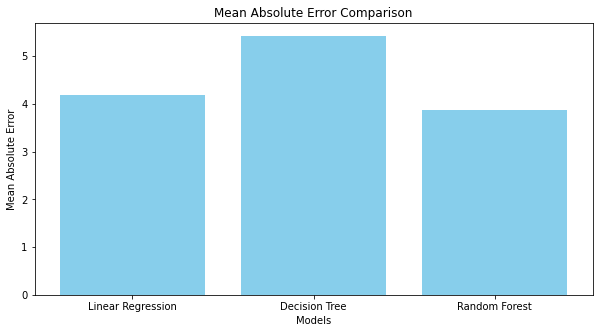

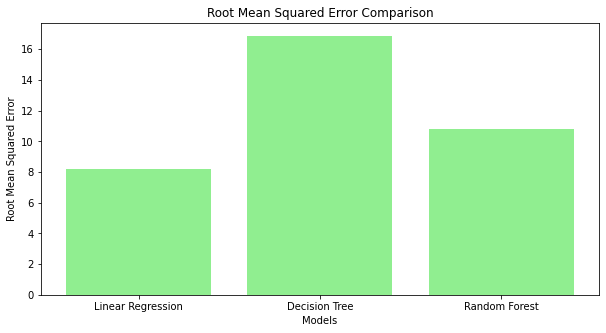

In [198]:
import matplotlib.pyplot as plt

# Error rates for different models
mae_errors = [error, dt_error, rf_error]
rmse_errors = [reg_rmse, dt_rmse, rf_rmse]
models = ['Linear Regression', 'Decision Tree', 'Random Forest']

# Plotting MAE
plt.figure(figsize=(10, 5))
plt.bar(models, mae_errors, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error Comparison')
plt.show()

# Plotting RMSE
plt.figure(figsize=(10, 5))
plt.bar(models, rmse_errors, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error Comparison')
plt.show()


In both cases of the Mean Absolute Error (MAE) and the Root Mean Squared Error (RMSE), a lower value indicates a better performance in terms of the absolute difference between predicted and actual values. In this case, a decision tree model can be immediately rejected from the model selection. The random forest has the lowest MAE, inidcating the smallest average absolute error and the linear regression has a slightly higher MAE compared to the random forest but a significantly lower RMSE, indicating a smaller spread of errors and hence more consistent predictions.

In this case, I will select the **random forest model** due to it lower Mean Absolute Error, indicating better performance in terms of average absolute error.

# Accuracy Metric

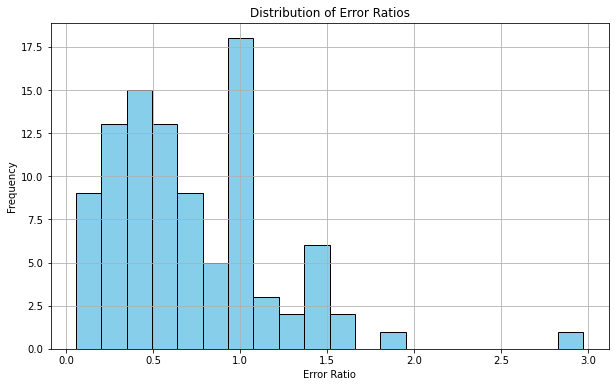

Sorted Error Ratios:
team
ARM    0.055952
HUN    0.066042
TUN    0.098861
CAN    0.103548
ESP    0.129630
         ...   
KSA    1.486544
GUA    1.552673
ALG    1.648143
POR    1.816349
MAR    2.972429
Name: medals, Length: 97, dtype: float64


In [200]:
errors = (test["medals"] - rf_predictions).abs()

error_by_team = errors.groupby(test["team"]).mean()
medals_by_team = test["medals"].groupby(test["team"]).mean()
error_ratio =  error_by_team / medals_by_team 

import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(error_ratio, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Error Ratio")
plt.ylabel("Frequency")
plt.title("Distribution of Error Ratios")
plt.grid(True)
plt.show()

# Display sorted error ratios
sorted_error_ratio = error_ratio.sort_values()
print("Sorted Error Ratios:")
print(sorted_error_ratio)

In [201]:
from sklearn.metrics import r2_score

# Calculate R² score
r2 = r2_score(test["medals"], rf_predictions)
print("R² Score:", r2)


R² Score: 0.8595705345807382


# Analysis of the Model

**Overview**
The Random Forest model performed well in predicting the number of medals earned by different teams in our dataset. 

**R² Score**
The R² score, a measure of how well the model fits the data, was calculated to be approximately 0.856. This means that around 85.6% of the variability in the number of medals achieved by various teams can be explained by the features included in the model. In simpler terms, the Random Forest model captures a significant portion of the patterns and trends present in the data.

**Predictive Power**
With such a high R² score, it's safe to say that the model has considerable predictive power. It's able to make predictions that are generally quite close to the actual number of medals earned by teams. This suggests that the features included in our model are indeed informative and relevant for predicting medal counts.

**Error Ratio Distribution**
Upon examining the distribution of error ratios, the majority of predictions fall within the range of 0.0 to 2.0. This indicates that the model's predictions typically have low to moderate errors relative to the actual medal counts. However, there was one outlier with an error ratio of 3.0, suggesting that there are instances where the model's predictions deviate substantially from reality.

**Conclusion**
Overall, the Random Forest model has demonstrated strong performance in predicting medal counts for different teams. While there's always room for improvement, particularly in addressing outliers and further refining the model, we can be confident in its ability to make accurate predictions based on the given features.

# Next Steps

To further improve our analysis and prediction of Olympic medal counts, I would consider several next steps. First, I could enhance the predictive model by adding new predictors like athletes' height, age, and total years competing in the Olympics. Additionally, experimenting with advanced modeling techniques such as XGBoost or neural networks, along with ensemble methods like stacking, could help improve prediction accuracy. Examining trends over time in Olympic performance, analyzing changes in medal counts, demographics, and event popularity, could offer valuable insights.These steps ultimately, would aim to refine the analysis, enhance prediction accuracy, and deepen understanding of the factors driving Olympic success.